Read a000_10M_deps24.0.stats.dat
Read a000_10M_deps24.0.traj.npy
Read a001_10M_deps24.0.stats.dat
Read a001_10M_deps24.0.traj.npy
Read a002_10M_deps24.0.stats.dat
Read a002_10M_deps24.0.traj.npy
Read a003_10M_deps24.0.stats.dat
Read a003_10M_deps24.0.traj.npy
Read a004_10M_deps24.0.stats.dat
Read a004_10M_deps24.0.traj.npy
Read a005_10M_deps24.0.stats.dat
Read a005_10M_deps24.0.traj.npy
Read a006_10M_deps24.0.stats.dat
Read a006_10M_deps24.0.traj.npy
Read b000_10M_deps24.0.stats.dat
Read b000_10M_deps24.0.traj.npy
Read b001_10M_deps24.0.stats.dat
Read b001_10M_deps24.0.traj.npy
Read b002_10M_deps24.0.stats.dat
Read b002_10M_deps24.0.traj.npy
Read b003_10M_deps24.0.stats.dat
Read b003_10M_deps24.0.traj.npy
Read b004_10M_deps24.0.stats.dat
Read b004_10M_deps24.0.traj.npy
Read b005_10M_deps24.0.stats.dat
Read b005_10M_deps24.0.traj.npy
Read b006_10M_deps24.0.stats.dat
Read b006_10M_deps24.0.traj.npy
Read c000_10M_deps24.0.stats.dat
Read c000_10M_deps24.0.traj.npy
Read c001_10M_deps24.0.st

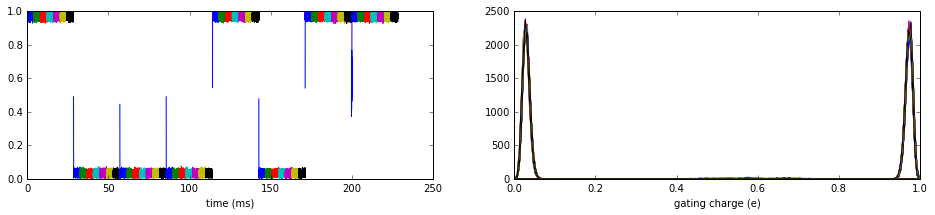

In [9]:
import glob

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from IsingTrajectory import *

t = IsingTrajectory()

skip_frames = 1

dq = 1.0/(20*20)   # gating charge/ncells

plt.figure(figsize=(16,3))

#ntrials = 20
#my_depsilons = [(this_depsilon = 24.0 - trial*0.5) for trial in range(ntrials)]

filenames = glob.glob('?00?_10M_deps24.0*.npy')
ntrials = len(filenames)

start_time = 0.0

for trial in range(ntrials):
    
    #this_depsilon = 24.0 - trial*0.5
    
    plt.subplot(1,2,1)
    #t.load('trj%d_10M'%trial)
    t.load(filenames[trial].replace('.traj.npy',''))
    # Let's make a time trace of the gating charge
    timepoints = start_time + t.stats[skip_frames:,0]
    gating_charge = dq*t.traj[skip_frames:,:].sum(axis=1)
    plt.plot(timepoints*1000.0, gating_charge)   # convert to ms
    start_time += t.stats[-1,0]
    plt.xlabel('time (ms)')

    plt.subplot(1,2,2)
    # Let's make a histogram of the gating charge
    qbins = np.arange(0.0, 1.0+2*dq, 2*dq)
    qcenters = (qbins[0:-1]+qbins[1:])/2.0
    counts, edges = np.histogram(dq*t.traj[skip_frames:,:].sum(axis=1), bins=qbins)
    mylabel = (filenames[trial].split('_')[2]).replace('.traj.npy','')
    plt.plot(qcenters,counts, label=mylabel)
    plt.xlabel('gating charge (e)')

#plt.legend(loc='best')


[-22.01744705 -19.4925988  -19.9170876  ..., -25.29390862 -21.88500048
 -20.79623273]


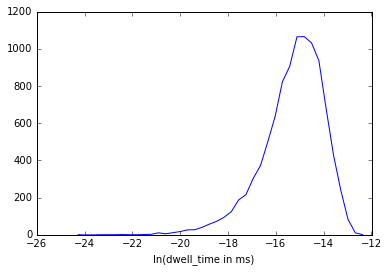

In [7]:
# Let's make a histogram of the ln(dwell time )
print np.log(t.stats[skip_frames:,1])
dwell_times_in_ms = t.stats[1:,1]*1000.0
counts, bin_edges = np.histogram(np.log(dwell_times_in_ms), bins=40)
bin_centers = (bin_edges[0:-1]+bin_edges[1:])/2.0
plt.plot(bin_centers,counts)
plt.xlabel('ln(dwell_time in ms)')


### animations!

Following instructions from http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/


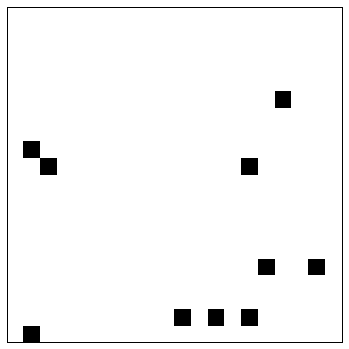

In [3]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots( figsize=(6,6) )

ax.set_xlim(( 0, 20))
ax.set_ylim((0, 20))
plt.xticks([])
plt.yticks([])

# load in trajectory?
# t = 

# 1000 frames makes a nice animation
animation_frames = 1000
traj_stride = t.nframes/animation_frames

z = t.traj[0].reshape( (20,20))
quad = plt.pcolor(z, cmap='Greys')


# initialization function: plot the background of each frame
def init():
    z = t.traj[0].reshape( (20,20))
    #quad = plt.pcolor(z, cmap='Greys')

    quad.set_array(np.nan)
    return (quad,)

# animation function. This is called sequentially
def animate(i, stride=traj_stride):
    z = t.traj[stride*i].reshape((20,20))
    #quad = plt.pcolor(z, cmap='Greys')
    quad.set_array(z.ravel())
    #plt.title('Phase: %.2f'%i)
    return (quad,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=20, blit=True)

HTML(anim.to_html5_video())